In [1]:
# install these libraries for sentiment analysis
! pip install textblob
! pip install tweepy
! pip install nltk

In [2]:
# Importing libraries
import tweepy
import pandas as pd
import time
import re   # RegEx (Regular Expressions) module use to remove special characters, symbols from the tweet 
import tweepy 
from tweepy import OAuthHandler # use to access your twitter account
from textblob import TextBlob  # for sentiment analysis
import nltk

In [3]:
# define consumer key(API key), Authentication token for your twitter account to scrape the data from the twitter
Bearer_Token = "AAAAAAAAAAAAAAAAAAAAAMfxwAEAAAAAo2buDnA1943vti0RZWR73%2F68MEs%3DahsHrfzuMyLZMAm0lUBAsuz5Z292DUBHF4kQGtpvyj6xUut4re"
consumer_key = "qlq2H9fbdMs5mD9WjOtBLjXXD"
consumer_secret = "ctyY8wRHzwwSGzVrudfyEDMyhDejj57s69Fpz20QrSqIciZJfb"
access_token = "1841190125457313793-Lkz7433UxnieDLuMxRYhVs1EYw9cES"
access_token_secret = "REXuLy4JPDVeyConePZaYpvIKfdjnFRuS6e3O7KdfNJu5"

In [4]:
# attempt authentication
try:
    # create OAuthHandler object
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) # access your twitter account using OAuthHandler func
    # set access token and secret
    auth.set_access_token(access_token, access_token_secret)
    # create tweepy API object to fetch tweets
    api = tweepy.API(auth,wait_on_rate_limit=True)  # extract tweets from the twitter using API func
except:
    print("Error: Authentication Failed")

In [5]:
def clean_tweet(tweet):  # define clean_tweet func to remove special characters, symbols from the tweet using RegEx module
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) # replaces special characters with blank space in tweet column

In [6]:
def get_tweet_sentiment(score): # define get_tweet_sentiment func to classify the tweet as positive, negative & neutral tweet 
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''

    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'

In [23]:
# extract 1000 latest tweets of terrorist using search_tweets func & save in var. tweets
tweets = api.search_tweets(q='terrorist',lang='en',count=1000)

In [24]:
# tweets has so a long list but we want only 3 things: tweet id, at what time tweets are created, what is inside the tweet
tweets_list=[[tweet.id,tweet.created_at,tweet.text] for tweet in tweets ]

In [25]:
# create a dataframe for tweet id, at what time tweets are created, what is inside the tweet
tweets_df = pd.DataFrame(tweets_list,columns=['Tweet Id', 'Datetime', 'tweet'])


In [26]:
tweets_df.head() # display top 5 rows

,Tweet Id,Datetime,tweet
0,1643286479374827521,2023-04-04 16:16:42+00:00,RT @business: Former New Zealand PM Jacinda Ar...
1,1643286479328931840,2023-04-04 16:16:42+00:00,@zoo_bear @DelhiPolice Self defence is not pro...
2,1643286479026757638,2023-04-04 16:16:42+00:00,@OnlinePalEng Your usual BS. Her terrorist son...
3,1643286478691393538,2023-04-04 16:16:41+00:00,@Reuters Their comrade was a terrorist who mur...
4,1643286478653382656,2023-04-04 16:16:41+00:00,RT @MattWalshBlog: I know we're focused on the...


In [27]:
# call clean_tweet func & apply it on column tweet to remove special characters 
tweets_df["clean_text"] = tweets_df["tweet"].apply(lambda tweet: clean_tweet(tweet))

In [28]:
tweets_df.head()

,Tweet Id,Datetime,tweet,clean_text
0,1643286479374827521,2023-04-04 16:16:42+00:00,RT @business: Former New Zealand PM Jacinda Ar...,RT Former New Zealand PM Jacinda Ardern will l...
1,1643286479328931840,2023-04-04 16:16:42+00:00,@zoo_bear @DelhiPolice Self defence is not pro...,bear Self defence is not provocation ask any t...
2,1643286479026757638,2023-04-04 16:16:42+00:00,@OnlinePalEng Your usual BS. Her terrorist son...,Your usual BS Her terrorist son was killed bec...
3,1643286478691393538,2023-04-04 16:16:41+00:00,@Reuters Their comrade was a terrorist who mur...,Their comrade was a terrorist who murdered six...
4,1643286478653382656,2023-04-04 16:16:41+00:00,RT @MattWalshBlog: I know we're focused on the...,RT I know we re focused on the Trump stuff whi...


In [29]:
# nltk lib. has vader lexicon sub lib. which has SentimentIntensityAnalyzer func. 
#SentimentIntensityAnalyzer func runs the entire NLP pipeline to do sentiment analysis of any sentence  
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()  # initialise SentimentIntensityAnalyzer func 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\khatr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
# apply SentimentIntensityAnalyzer func on column clean_text
tweets_df["score"] = tweets_df["clean_text"].apply(lambda review:sid.polarity_scores(review))
tweets_df.head()

,Tweet Id,Datetime,tweet,clean_text,score
0,1643286479374827521,2023-04-04 16:16:42+00:00,RT @business: Former New Zealand PM Jacinda Ar...,RT Former New Zealand PM Jacinda Ardern will l...,"{'neg': 0.292, 'neu': 0.542, 'pos': 0.166, 'co..."
1,1643286479328931840,2023-04-04 16:16:42+00:00,@zoo_bear @DelhiPolice Self defence is not pro...,bear Self defence is not provocation ask any t...,"{'neg': 0.333, 'neu': 0.567, 'pos': 0.099, 'co..."
2,1643286479026757638,2023-04-04 16:16:42+00:00,@OnlinePalEng Your usual BS. Her terrorist son...,Your usual BS Her terrorist son was killed bec...,"{'neg': 0.397, 'neu': 0.603, 'pos': 0.0, 'comp..."
3,1643286478691393538,2023-04-04 16:16:41+00:00,@Reuters Their comrade was a terrorist who mur...,Their comrade was a terrorist who murdered six...,"{'neg': 0.371, 'neu': 0.531, 'pos': 0.098, 'co..."
4,1643286478653382656,2023-04-04 16:16:41+00:00,RT @MattWalshBlog: I know we're focused on the...,RT I know we re focused on the Trump stuff whi...,"{'neg': 0.236, 'neu': 0.649, 'pos': 0.115, 'co..."


In [31]:
# compound score represents the total sentiment of a tweet. So, retrieve compound score from the column score
tweets_df["compound"] = tweets_df["score"].apply(lambda d:d["compound"])

# call get_tweet_sentiment func & apply it on column compound to do sentiment analysis of a tweet 
tweets_df["sentiment"] = tweets_df["compound"].apply(lambda  score : get_tweet_sentiment(score))
        
del tweets_df["score"]    # delete score column
del tweets_df["compound"]  # delete compound column 

In [32]:
tweets_df.head()

,Tweet Id,Datetime,tweet,clean_text,sentiment
0,1643286479374827521,2023-04-04 16:16:42+00:00,RT @business: Former New Zealand PM Jacinda Ar...,RT Former New Zealand PM Jacinda Ardern will l...,negative
1,1643286479328931840,2023-04-04 16:16:42+00:00,@zoo_bear @DelhiPolice Self defence is not pro...,bear Self defence is not provocation ask any t...,negative
2,1643286479026757638,2023-04-04 16:16:42+00:00,@OnlinePalEng Your usual BS. Her terrorist son...,Your usual BS Her terrorist son was killed bec...,negative
3,1643286478691393538,2023-04-04 16:16:41+00:00,@Reuters Their comrade was a terrorist who mur...,Their comrade was a terrorist who murdered six...,negative
4,1643286478653382656,2023-04-04 16:16:41+00:00,RT @MattWalshBlog: I know we're focused on the...,RT I know we re focused on the Trump stuff whi...,negative


c:\Users\khatr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

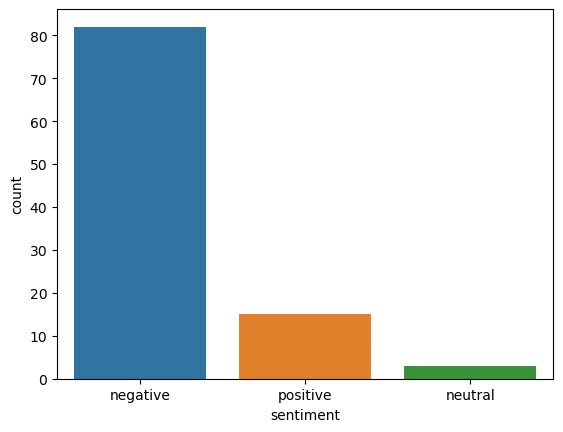

In [33]:
import seaborn as sns
sns.countplot(tweets_df['sentiment'])   # to count no. of positive, negative & neutral tweets 

Out of 1000 tweets, 80% of the tweets are negative about terrorist. It means our model is performing good 